### Questions:
data source - https://www.open990.org/catalog/, this company provides raw data for free, however they also provide analytics services for a charge https://appliednonprofitresearch.com/customdata/
1. which not-for-profits might be at the highest risk for fraud?
    1. salary expense as a percentage of total income
    1. have a small number of staff members compared to the volume of money raised
    1. have a small number of voting members and independent voting members compared to volume of money raised
        - this could be indicative of low oversight of the organization
1. if I were a contractor wanting to do business with not-for-profits, which orgs should I be targeting?
    1. what are the biggest expenses paid by non-profits?
    1. what are the top expenses based on type of org
     - non-profits that have specific goals, eg. homlessness

#### Information to inform my process
https://nonprofitrisk.org/resources/articles/a-violation-of-trust-fraud-risk-in-nonprofit-organizations/

One area in which nonprofit organizations seem particularly vulnerable is billing schemes, in which an employee fraudulently submits invoices to obtain payments he or she is not entitled to receive. According to the most recent ACFE survey, billing schemes were among the most common fraud methods in the cases studied for the 2012 report.

Billing schemes often involve the creation of a shell company. In such a fraud, a dishonest employee sets up a fake identity that bills for good or services the organization does not receive. In some instances, goods or services may be delivered but are marked up excessively, with the proceeds diverted to the employee.

In [316]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from scipy.stats.mstats import winsorize


In [4]:
# source of data
# https://www.open990.org/catalog/

df = pd.read_csv('data/Open990_Contractor_Compensation_Snack_Set_Public_2019-01-24.csv',
                 encoding = 'unicode_escape',
                 engine='python')

### Pre-Processing Steps
1. refine categories of non-profit mission/purpose statements
    - completing this in *990_mission_statement* notebook.
1. convert NaN values into False
    - for many boolean fields in the 990, the absense of a response is interpreted as NaN, converting these to False will allow for a machine readable format. 
1. format target variable for machine learning algorithems to make predictions on
    - somewhere around 10% of the dataset
1. 
1. bin non-profits into size based on income? distribution? volunteers? ect., maybe 10 bins
1. 

In [5]:
df.shape

(237448, 110)

In [128]:
df.head()

,ein,name_org,tax_date_begin,tax_date_end,tax_yr,doing_business_as,phone,website,address,city,state,country,zip,org_form.corp,org_form.trust,org_form.association,org_form.other_form,org_form.other_form_desc,formation_yr,grp_exempt_num,state_legaldomicile,grp_return,grp_subs_all_incl,exempt_status.501c3,exempt_status.501c_any,exempt_status.501c_txt,gross_receipts,discontinue_dispose25,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_giftsgrants_tot_prioryr,rev_prgmservice_prioryr,rev_investmt_prioryr,rev_other_prioryr,rev_tot_prioryr,grants_expense_tot_prioryr,benefits_expense_tot_prioryr,salaries_expense_tot_prioryr,fundraiseservfee_expense_tot_prioryr,fundraise_expense_tot_curyr,other_expense_tot_prioryr,expense_tot_prioryr,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_giftsgrants_tot_curyr,rev_prgmservice_curyr,rev_investmt_curyr,rev_other_curyr,rev_tot_curyr,grants_expense_tot_curyr,benefits_expense_tot_curyr,salaries_expense_tot_curyr,fundraiseservfee_expense_tot_curyr,other_expense_tot_curyr,expense_tot_curyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,name_contractor_1,address_contractor_1,city_contractor_1,state_contractor_1,zip_contractor_1,country_contractor_1,services_contractor_1,amt_paid_contractor_1,name_contractor_2,address_contractor_2,city_contractor_2,state_contractor_2,zip_contractor_2,country_contractor_2,services_contractor_2,amt_paid_contractor_2,name_contractor_3,address_contractor_3,city_contractor_3,state_contractor_3,zip_contractor_3,country_contractor_3,services_contractor_3,amt_paid_contractor_3,name_contractor_4,address_contractor_4,city_contractor_4,state_contractor_4,zip_contractor_4,country_contractor_4,services_contractor_4,amt_paid_contractor_4,name_contractor_5,address_contractor_5,city_contractor_5,state_contractor_5,zip_contractor_5,country_contractor_5,services_contractor_5,amt_paid_contractor_5,contractor_100k_ct,record_id,schema_version,irs_efile_id,random_string,sal_exp_dif_rev
0,10018927,AMERICAN LEGION POST 5 BOURQUE-LANIGAN,2016-01-01,2016-12-31,2016,AMERICAN LEGION POST 5,+1 (207) 872-8824,WTVLLEGION.ORG,21 COLLEGE AVENUE,WATERVILLE,ME,NaN,04901,True,NaN,NaN,NaN,NaN,1926.0,925.0,ME,no,NaN,NaN,True,19.0,501808,NaN,9,9,8,0.0,0,0.0,11458.0,0.0,983.0,137239.0,149680.0,0.0,20120.0,61034.0,0.0,0,113034.0,194188.0,-44508.0,595704.0,29618.0,566086.0,12549,0,1036,128465,142050,0,22141,62171,0,100057,184369,-42319,561928,38161,523767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,010018927_201612,2016v3.0,201721359349307007,NzM0MjczMTQ5MzAyOTkxNjA2NQ,0.437670
1,10018930,AMERICAN LEGION - MAINE DEPARTMENT,2015-05-01,2016-04-30,2016,NaN,+1 (207) 873-3229,WWW.MAINELEGION.ORG,PO BOX 900,WINSLOW,ME,NaN,049010727,True,NaN,NaN,NaN,NaN,1919.0,NaN,ME,no,NaN,NaN,True,19.0,784286,NaN,60,56,10,NaN,0,NaN,488958.0,214498.0,2452.0,62279.0,768187.0,3500.0,NaN,263411.0,NaN,0,518288.0,785199.0,-17012.0,941168.0,364115.0,577053.0,487889,210898,1613,83886,784286,4500,0,245792,0,482665,732957,51329,995802,367420,628382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,010018930_201604,2015v2.1,201622149349301207,NjA2ODIzMDg0NzYyMzA2MDM2NA,0.313396
2,10019705,Ancient Free and Accepted Masons of Maine Gran...,2015-04-01,2016-03-31,2016,NaN,+1 (207) 358-3110,www.mainemason.org,P O Box 430,Holden,ME,NaN,044290430,True,NaN,NaN,NaN,NaN,1820.0,275.0,ME,no,NaN,NaN,True,10.0,362909,NaN,11,9,5,0.0,0,0.0,1837.0,321565.0,29073.0,1972.0,354447.0,0.0,0.0,78522.0,0.0,0,236707.0,315229.0,39218.0,1704310.0,0.0,1704310.0,1402,315455,29298,-13191,332964,18061,0,86383,0,241884,346328,-13364,1640608,0,1640608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Salaries Exp / Rev

In [123]:
# identify columns with salary in them
for c in df.columns:
    if 'salar' in c:
        print(c)       

salaries_expense_tot_prioryr
salaries_expense_tot_curyr


In [126]:
# identify columns with revenue in them
for c in df.columns:
    if 'rev_tot' in c:
        print(c)       

rev_tot_prioryr
rev_tot_curyr


In [127]:
df['sal_exp_dif_rev'] = df.salaries_expense_tot_curyr / df.rev_tot_curyr

In [132]:
x = df['sal_exp_dif_rev'].copy()

In [135]:
# remove infinite values
x.replace(-np.inf, np.nan, inplace=True)
x.replace(np.inf, np.nan, inplace=True)
x.dropna(inplace=True)

In [144]:
x.max()

107663.5

In [145]:
x.min()

-2925.2

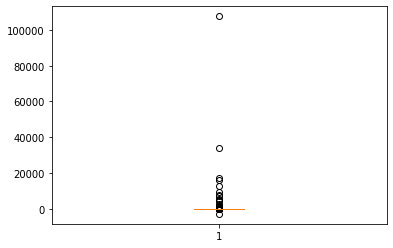

In [146]:
# there are big outliers
plt.boxplot(x);

###  Employees as a percentage of over 100K contractors

In [148]:
# identify columns with employee in them
for c in df.columns:
    if 'employee' in c:
        print(c)       

employee_tot_ct


In [150]:
# identify columns with count of vendors
for c in df.columns:
    if '100k_ct' in c:
        print(c)       

contractor_100k_ct


In [199]:
df_con = df[df['contractor_100k_ct'] > 0]

In [275]:
df_con.shape

(30533, 113)

In [293]:
# SettingWithCopyWarning
# I see no reason why it should be raised in this situation
pd.options.mode.chained_assignment = None

df_con['con_ct_div_emp_ct'] = df_con['contractor_100k_ct'] / df_con['employee_tot_ct']

In [294]:
df_con.head()

,ein,name_org,tax_date_begin,tax_date_end,tax_yr,doing_business_as,phone,website,address,city,state,country,zip,org_form.corp,org_form.trust,org_form.association,org_form.other_form,org_form.other_form_desc,formation_yr,grp_exempt_num,state_legaldomicile,grp_return,grp_subs_all_incl,exempt_status.501c3,exempt_status.501c_any,exempt_status.501c_txt,gross_receipts,discontinue_dispose25,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_giftsgrants_tot_prioryr,rev_prgmservice_prioryr,rev_investmt_prioryr,rev_other_prioryr,rev_tot_prioryr,grants_expense_tot_prioryr,benefits_expense_tot_prioryr,salaries_expense_tot_prioryr,fundraiseservfee_expense_tot_prioryr,fundraise_expense_tot_curyr,other_expense_tot_prioryr,expense_tot_prioryr,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_giftsgrants_tot_curyr,rev_prgmservice_curyr,rev_investmt_curyr,rev_other_curyr,rev_tot_curyr,grants_expense_tot_curyr,benefits_expense_tot_curyr,salaries_expense_tot_curyr,fundraiseservfee_expense_tot_curyr,other_expense_tot_curyr,expense_tot_curyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,name_contractor_1,address_contractor_1,city_contractor_1,state_contractor_1,zip_contractor_1,country_contractor_1,services_contractor_1,amt_paid_contractor_1,name_contractor_2,address_contractor_2,city_contractor_2,state_contractor_2,zip_contractor_2,country_contractor_2,services_contractor_2,amt_paid_contractor_2,name_contractor_3,address_contractor_3,city_contractor_3,state_contractor_3,zip_contractor_3,country_contractor_3,services_contractor_3,amt_paid_contractor_3,name_contractor_4,address_contractor_4,city_contractor_4,state_contractor_4,zip_contractor_4,country_contractor_4,services_contractor_4,amt_paid_contractor_4,name_contractor_5,address_contractor_5,city_contractor_5,state_contractor_5,zip_contractor_5,country_contractor_5,services_contractor_5,amt_paid_contractor_5,contractor_100k_ct,record_id,schema_version,irs_efile_id,random_string,sal_exp_dif_rev,emp_ct_dif_con_ct,con_ct_div_emp_ct
13,10056837,EASTERN MAINE ELECTRIC COOPERATIVE INC,2016-01-01,2016-12-31,2016,NaN,+1 (207) 454-7555,www.emec.com,PO Box 425,Calais,ME,NaN,046190425,True,NaN,NaN,NaN,NaN,1940.0,NaN,ME,no,NaN,NaN,True,12.0,15549792,NaN,11,11,37,0.0,0,0.0,0.0,15540869.0,280449.0,0.0,15821318.0,0.0,352726.0,1774024.0,0.0,0,13694568.0,15821318.0,0.0,39372255.0,26541056.0,12831199.0,0,15214173,335619,0,15549792,0,-242865,1753677,0,14038980,15549792,0,39367859,26785093,12582766,Lucas Tree Experts,PO Box 958,Portland,ME,04104,NaN,Tree Clearing Work,144757.0,Preti Flaherty Beliveau Pachios LLP,PO Box 9546,Portland,ME,04112,NaN,Legal,284923.0,On Target Utility Services,617 Water St,Gardiner,ME,04345,NaN,Utility Construction,526681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,010056837_201612,2016v3.0,201722499349300607,NTk1ODY4MDk3ODk3NjYyMDY2OQ,0.112778,12.333333,0.081081
17,10079380,CPORT CREDIT UNION,2016-01-01,2016-12-31,2016,NaN,+1 (207) 878-6200,WWW.CPORTCU.ORG,PO BOX 777,PORTLAND,ME,NaN,04104,True,NaN,NaN,NaN,NaN,1931.0,NaN,ME,no,NaN,NaN,True,14.0,9472036,NaN,9,8,81,8.0,52565,-75519.0,0.0,8093378.0,128192.0,162461.0,8384031.0,0.0,850819.0,3076199.0,0.0,0,3456770.0,7383788.0,1000243.0,173898488.0,157544120.0,16354368.0,0,9089872,158726,223438,9472036,0,752626,3404135,0,4052976,8209737,1262299,188534687,170915216,17619471,SYNERGENT,2 LEDGEVIEW DRIVE,WESTBROOK,ME,04092,NaN,CORE PROCESSING AND RELATED SERVICES,806186.0,SYSTEMS ENGINEERING,120 EXCHANGE STREET,PORTLAND,ME,04101,NaN,INFORMATION TECH. SERVICES,171160.0,PM SYSTEMS (ACI WORLDWIDE CORP),99944 COLLECTION CENTER DR,CHICAGO,IL,60693,NaN,ONLINE BANKING PROVIDER,147655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,010079380_201612,2016v3.0,201713179349301261,NTAxNDUzNjQ4MzgwNDIzMTg2MA,0.359388,27.000000,0.037037
27,10114035,Maine Education Association,2015-09-01,20

In [295]:
# how many orgs had zero employees?
# this will create 'inf'

df_con[df_con['con_ct_div_emp_ct'] == np.inf].shape

(6458, 113)

In [296]:
df_con['con_ct_div_emp_ct'].max()

inf

In [297]:
df_con['con_ct_div_emp_ct'].min()

0.00016976199368485385

In [298]:
# drop inf values
df_con.drop(df_con[df_con['con_ct_div_emp_ct'] == np.inf].index, inplace=True)

In [300]:
# verify they have been removed

df_con[df_con['con_ct_div_emp_ct'] == np.inf].shape

(0, 113)

In [301]:
# how many orgs remain?
df_con.shape

(24075, 113)

In [315]:
df_con['con_ct_div_emp_ct'].max()

4048.5789473684213

#### Visualizations

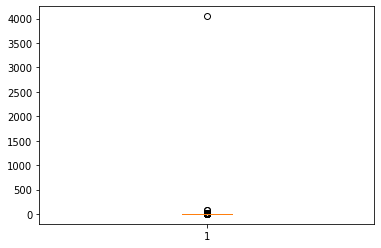

In [314]:
# a single outliers is way outside
plt.boxplot(df_con['con_ct_div_emp_ct']);

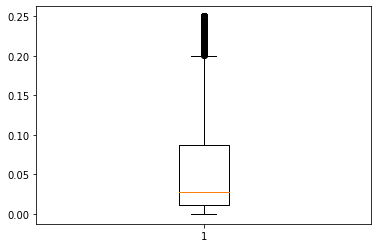

In [319]:
# removing the outlier helps things look more normal
plt.boxplot(winsorize(df_con['con_ct_div_emp_ct'], (0,.1)));

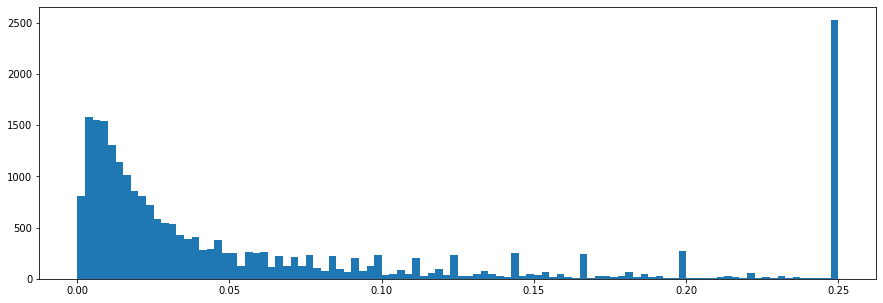

In [321]:
plt.subplots(figsize=(15, 5))

# distribution
plt.hist(winsorize(df_con['con_ct_div_emp_ct'], (0,.1)), bins=100);

###  Voting members as a percentage of revenue

In [326]:
# identify columns with vote in them
for c in df.columns:
    if 'vot' in c:
        print(c)       

voting_memb_ct
voting_indepmemb_ct


In [327]:
# identify columns with revenue
for c in df.columns:
    if 'rev_tot' in c:
        print(c)       

rev_tot_prioryr
rev_tot_curyr


In [331]:
df_vote = df.copy()

In [332]:
df_vote['vot_mem_div_rev'] = df_vote.voting_memb_ct / df_vote.rev_tot_curyr

In [338]:
# remove 0 values

df_vote.drop(df_vote[df_vote.voting_memb_ct == 0].index, inplace=True)

In [340]:
# remove inf values

df_vote.drop(df_vote[df_vote['vot_mem_div_rev'] == np.inf].index, inplace=True)

In [346]:
df_vote.voting_memb_ct.value_counts().head()

5    20514
7    20089
9    18792
6    15562
8    14447
Name: voting_memb_ct, dtype: int64

In [344]:
df_vote['vot_mem_div_rev'].value_counts(dropna=False).shape

(228224,)

In [337]:
df_vote['vot_mem_div_rev'].min()

-0.7019543973941368

In [336]:
df_vote['vot_mem_div_rev'].max()

17.5

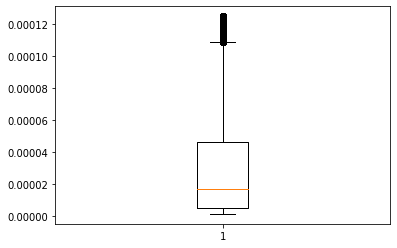

In [367]:
plt.boxplot(winsorize(df_vote['vot_mem_div_rev'],(.1, .1)));

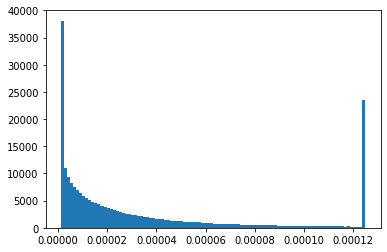

In [353]:
plt.hist(winsorize(df_vote['vot_mem_div_rev'],  (.1,.1)), bins=100);
# plt.hist(winsorize(df_con['con_ct_div_emp_ct'], (0,.1)), bins=100);

In [36]:
# find count of null values
(df.isna().sum()/df.isna().count()) * 100

ein                                      0.000000
name_org                                 0.000000
tax_date_begin                           0.000000
tax_date_end                             0.000000
tax_yr                                   0.000000
doing_business_as                       94.005424
phone                                   10.273407
website                                 34.804673
address                                  0.000421
city                                     0.002106
state                                    0.030322
country                                 99.917877
zip                                      0.010529
org_form.corp                           11.653499
org_form.trust                          96.870473
org_form.association                    95.570820
org_form.other_form                     97.630218
org_form.other_form_desc                98.252670
formation_yr                             7.177572
grp_exempt_num                          96.654847


In [5]:
# what is the date range
df.tax_date_begin.min()

'2014-12-27'

In [6]:
df.tax_date_begin.max()

'2016-12-28'

#### exempt_status.501c_txt

In [6]:
# what other 501c types are there?
df['exempt_status.501c_txt'].value_counts()

6.0     16719
4.0      8594
5.0      7296
7.0      6795
9.0      3925
8.0      2699
19.0     2688
12.0     2375
14.0     1955
2.0      1644
13.0     1398
10.0      851
25.0      378
15.0       91
17.0       40
29.0       14
26.0        8
11.0        7
16.0        7
27.0        3
18.0        3
23.0        2
20.0        1
Name: exempt_status.501c_txt, dtype: int64

#### org_form.other_form_desc

In [29]:
# how many different categories are there in org_form.other_form_desc?
# lots of messiness here, for instance non-profit with and without the dash

df[~df['org_form.other_form_desc'].isnull()].loc[:,'org_form.other_form_desc'].str.upper().value_counts(dropna=False).head(30)

LABOR UNION                   320
CREDIT UNION                  289
FOUNDATION                    223
UNION                         149
NON-PROFIT                    148
LLC                           132
NON PROFIT                    128
COOPERATIVE                    88
LABOR ORGANIZATION             84
FRATERNITY                     65
SCHOOL                         62
SEE SCHED O                    57
FRATERNAL                      52
CHURCH                         52
501(C)(3)                      48
NONPROFIT                      46
CLUB                           44
LOCAL UNION                    44
UNINCORPORATED ASSOCIATION     43
501C3                          42
CU                             39
SCH O                          35
EXEMPT                         34
ORGANIZATION                   30
NOT FOR PROFIT                 29
EXEMPT ORGANIZATION            27
PUBLIC CHARITY                 25
HOMEOWNERS ASSOCIATION         24
LABOR ORG.                     23
LABOR         

In [26]:
# how many different categories are there in org_form.other_form_desc?
# lots of messiness here, for instance non-profit with and without the dash

df[df['org_form.other_form_desc'].isnull()].shape

# .loc[:,'org_form.other_form_desc'].str.upper().value_counts().head(30)

(233299, 110)

#### Benefits Expense

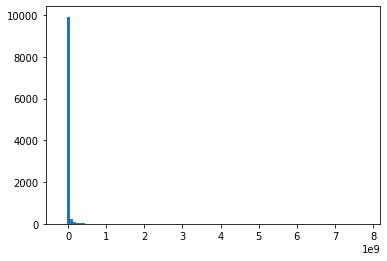

In [29]:
# examine benefits expense distribution
plt.hist(df[df['benefits_expense_tot_curyr'] != 0].loc[:,'benefits_expense_tot_curyr'], bins=100);

In [35]:
# average member benefits paid out
# there are some huge extremes in these values
df[df['benefits_expense_tot_curyr'] != 0].loc[:,'benefits_expense_tot_curyr'].mean()

18036318.160100427

In [32]:
# average member benefits paid out
df[df['benefits_expense_tot_curyr'] != 0].loc[:,'benefits_expense_tot_curyr'].min()

-189170543

In [34]:
# max member benefits paid out
df[df['benefits_expense_tot_curyr'] != 0].loc[:,'benefits_expense_tot_curyr'].max()

7788871365

#### contractor_100k_ct

In [9]:
# it looks like about half of 990 filers have
# contractor expenses over 100K
df['contractor_100k_ct'].value_counts().sort_index().head(10)

0.0    115683
1.0     11444
2.0      4468
3.0      2817
4.0      1873
5.0      2203
6.0       807
7.0       630
8.0       572
9.0       449
Name: contractor_100k_ct, dtype: int64

In [65]:
df['contractor_100k_ct'].value_counts().sort_index().tail(10)

1599.0      1
1684.0      1
1717.0      1
1725.0      1
1998.0      1
2554.0      1
2728.0      1
58669.0     1
265693.0    1
999999.0    1
Name: contractor_100k_ct, dtype: int64

In [13]:
# how many null values in contractor count
# these should really be 0, not null
df[df['contractor_100k_ct'].isnull()].shape

(91232, 110)

#### Count of Vendors for each non-profit

In [41]:
# how many vendors are included?
df[~df.name_contractor_1.isnull()].shape

(30589, 110)

In [42]:
# how many vendors are included?
df[~df.name_contractor_2.isnull()].shape

(19182, 110)

In [43]:
# how many vendors are included?
df[~df.name_contractor_3.isnull()].shape

(14678, 110)

In [44]:
# how many vendors are included?
df[~df.name_contractor_4.isnull()].shape

(11827, 110)

In [45]:
# how many vendors are included?
df[~df.name_contractor_5.isnull()].shape

(9923, 110)

In [14]:
# why are some vendors listed more than once?
df[~df.name_contractor_1.isnull()].loc[:,'name_contractor_1':'name_contractor_2'].head()

,name_contractor_1,address_contractor_1,city_contractor_1,state_contractor_1,zip_contractor_1,country_contractor_1,services_contractor_1,amt_paid_contractor_1,name_contractor_2
13,Lucas Tree Experts,PO Box 958,Portland,ME,04104,NaN,Tree Clearing Work,144757.0,Preti Flaherty Beliveau Pachios LLP
17,SYNERGENT,2 LEDGEVIEW DRIVE,WESTBROOK,ME,04092,NaN,CORE PROCESSING AND RELATED SERVICES,806186.0,SYSTEMS ENGINEERING
27,David H Simonds Esq,15 Columbia St Suite 303,Bangor,ME,04401,NaN,Legal Assistance to Members,189920.0,Cloutier Conley & Duffett PA
37,INSIGHT HEALTH CORP,NaN,NaN,NaN,NaN,NaN,MEDICAL STAFFING,455436.0,SODEXO CLINICAL TECHNOLOGY
45,JOHN BOSWELL,5 CLEARVIEW DRIVE,GORHAM,ME,04038,NaN,GOLF PRO,130028.0,NaN


In [61]:
# identical vendors multiple times?
# it appears these contractors are providing different
# types of services to the org

df[(df.name_contractor_1 == df.name_contractor_2) &
  (df.name_contractor_2 == df.name_contractor_3)].head()

,ein,name_org,tax_date_begin,tax_date_end,tax_yr,doing_business_as,phone,website,address,city,state,country,zip,org_form.corp,org_form.trust,org_form.association,org_form.other_form,org_form.other_form_desc,formation_yr,grp_exempt_num,state_legaldomicile,grp_return,grp_subs_all_incl,exempt_status.501c3,exempt_status.501c_any,exempt_status.501c_txt,gross_receipts,discontinue_dispose25,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_giftsgrants_tot_prioryr,rev_prgmservice_prioryr,rev_investmt_prioryr,rev_other_prioryr,rev_tot_prioryr,grants_expense_tot_prioryr,benefits_expense_tot_prioryr,salaries_expense_tot_prioryr,fundraiseservfee_expense_tot_prioryr,fundraise_expense_tot_curyr,other_expense_tot_prioryr,expense_tot_prioryr,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_giftsgrants_tot_curyr,rev_prgmservice_curyr,rev_investmt_curyr,rev_other_curyr,rev_tot_curyr,grants_expense_tot_curyr,benefits_expense_tot_curyr,salaries_expense_tot_curyr,fundraiseservfee_expense_tot_curyr,other_expense_tot_curyr,expense_tot_curyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,name_contractor_1,address_contractor_1,city_contractor_1,state_contractor_1,zip_contractor_1,country_contractor_1,services_contractor_1,amt_paid_contractor_1,name_contractor_2,address_contractor_2,city_contractor_2,state_contractor_2,zip_contractor_2,country_contractor_2,services_contractor_2,amt_paid_contractor_2,name_contractor_3,address_contractor_3,city_contractor_3,state_contractor_3,zip_contractor_3,country_contractor_3,services_contractor_3,amt_paid_contractor_3,name_contractor_4,address_contractor_4,city_contractor_4,state_contractor_4,zip_contractor_4,country_contractor_4,services_contractor_4,amt_paid_contractor_4,name_contractor_5,address_contractor_5,city_contractor_5,state_contractor_5,zip_contractor_5,country_contractor_5,services_contractor_5,amt_paid_contractor_5,contractor_100k_ct,record_id,schema_version,irs_efile_id,random_string
75739,273428380,CICLAVIA INC,2015-07-01,2016-06-30,2016,NaN,+1 (213) 365-0605,CICLAVIA.ORG,525 S HEWITT STREET,LOS ANGELES,CA,NaN,90013,True,NaN,NaN,NaN,NaN,2010.0,NaN,CA,no,NaN,True,NaN,NaN,1477406,NaN,15,15,8,1185.0,0,0.0,1640977.0,0.0,22415.0,0.0,1663392.0,0.0,0.0,83217.0,87000.0,156216,1535261.0,1705478.0,-42086.0,1276603.0,197316.0,1079287.0,1401912,0,154,12568,1414634,0,0,429403,39000,1469728,1938131,-523497,757390,201600,555790,COMMUNITY ARTS RESOURCES,3780 WILSHIRE BOULEVARD SUITE 1020,LOS ANGELES,CA,90010,NaN,EVENT PRE-PRODUCTION,409250.0,COMMUNITY ARTS RESOURCES,3780 WILSHIRE BOULEVARD SUITE 1020,LOS ANGELES,CA,90010,NaN,ADMINISTRATIVE SERVICES,62881.0,COMMUNITY ARTS RESOURCES,3780 WILSHIRE BOULEVARD SUITE 1020,LOS ANGELES,CA,90010,NaN,DEVELOPMENT SERVICES,60893.0,COMMUNITY ARTS RESOURCES,3780 WILSHIRE BOULEVARD SUITE 1020,LOS ANGELES,CA,90010,NaN,EVENT ON-SITE PRODUCTION,56187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,273428380_201606,2015v3.0,201731329349307188,ODY4MjY3ODgwMDc1OTczNzEw
179550,630334002,SOUTHEASTERN IRON WORKERS WELFARE PLAN,2015-02-01,2016-01-31,2016,NaN,+1 (615) 859-0131,NaN,PO BOX 1449,GOODLETTSVILLE,TN,NaN,37370,NaN,True,NaN,NaN,NaN,1953.0,NaN,TN,no,NaN,NaN,True,9.0,37965541,NaN,16,0,0,0.0,0,0.0,0.0,20145528.0,857228.0,0.0,21002756.0,0.0,19937228.0,0.0,0.0,0,1807500.0,21744728.0,-741972.0,15255799.0,78073.0,15177726.0,0,25538091,309120,0,25847211,0,19161438,0,0,1897297,21058735,4788476,19440301,88041,19352260,CONNECTICUT GENERAL LIFE INSURANCE COMPA,3500 PIEDMONT ROAD STE 200,ATLANTA,GA,30305,NaN,STOP LOSS COVERAGE,895588.0,CONNECTICUT GENERAL LIFE INSURANCE COMPA,3500 PIEDMONT ROAD STE 200,ATLANTA,GA,30305,NaN,CLAIMS ADMINISTRATION,809444.0,CONNECTICUT GENERAL LIFE INSURANCE COMPA,3500 PIEDMONT ROAD STE 200,ATLANTA,GA,30305,NaN,PPO ACCESS,220540.0,GEMGROUP,1200 THREE GATEWAY CENTER,PITTSBURGH,PA,15222,NaN,PLAN ADMINISTRATION,213483.0,SOUTHERN BENEFIT,2001 CALDWELL DR

#### Join Mission of Non-Profit Orgs - this was running very slowly, by refining the mission statements into fewer categories, I'm hoping to improve this

In [90]:
df.dtypes.head()

ein                int64
name_org          object
tax_date_begin    object
tax_date_end      object
tax_yr             int64
dtype: object

In [93]:
# join EIN numbers and pullin
# the organization’s mission or most significant activities:

df.set_index('ein').join(org_mission.set_index('ein_org'), how='left')


KeyboardInterrupt



In [91]:
# join EIN numbers and pullin
# the organization’s mission or most significant activities:

df.merge(org_mission, 
         how='left',
         left_on='ein',
         right_on='ein_org')

KeyboardInterrupt: 